Optimal solution found:


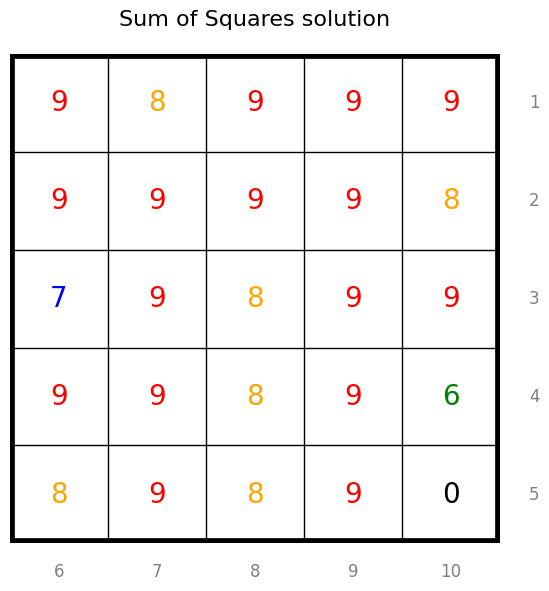

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ortools.sat.python import cp_model

def solve_and_plot_5x5_divisibility():
    """Solve the 5x5 divisibility problem and plot the solution in a custom style."""
    model = cp_model.CpModel()

    # Example divisors (adapt to your problem)
    row_divisors = [1, 2, 3, 4, 5]
    col_divisors = [6, 7, 8, 9, 10]

    # Create 5×5 matrix of digit variables in [0..9]
    X = np.array([
        [model.NewIntVar(0, 9, f'x[{i},{j}]') for j in range(5)]
        for i in range(5)
    ])

    # Row 5-digit numbers with divisibility constraints
    row_values = []
    for i in range(5):
        row_val = model.NewIntVar(0, 99999, f'row_val_{i}')
        model.Add(row_val == sum(X[i, j] * 10**(4 - j) for j in range(5)))
        model.AddModuloEquality(0, row_val, row_divisors[i])
        row_values.append(row_val)

    # Column 5-digit numbers with divisibility constraints
    col_values = []
    for j in range(5):
        col_val = model.NewIntVar(0, 99999, f'col_val_{j}')
        model.Add(col_val == sum(X[i, j] * 10**(4 - i) for i in range(5)))
        model.AddModuloEquality(0, col_val, col_divisors[j])
        col_values.append(col_val)

    # Objective: maximize sum of all digits
    model.Maximize(sum(X[i, j] for i in range(5) for j in range(5)))

    # Solve
    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    if status == cp_model.OPTIMAL:
        # Extract solution
        grid = np.array([[solver.Value(X[i,j]) for j in range(5)] for i in range(5)])
        row_nums = [solver.Value(rv) for rv in row_values]
        col_nums = [solver.Value(cv) for cv in col_values]
        '''
        # Print textual output (optional)
        print("Solution Grid:")
        for i in range(5):
            print(grid[i])
        print("\nRow Values:")
        for i in range(5):
            print(f"Row {i+1}: {row_nums[i]:05d} (divisible by {row_divisors[i]})")
        print("\nColumn Values:")
        for j in range(5):
            print(f"Column {j+1}: {col_nums[j]:05d} (divisible by {col_divisors[j]})")
        print("\nObjective (sum of digits):", solver.ObjectiveValue())
        '''
        print("Optimal solution found:")
        # Now plot the solution in a 5x5 matrix
        plot_solution(
            grid,
            row_divs=row_divisors,
            col_divs=col_divisors,
            row_nums=row_nums,
            col_nums=col_nums
        )
    else:
        print("No optimal solution found. Status =", status)

def plot_solution(grid, row_divs, col_divs, row_nums, col_nums):
    """
    Plots a 5x5 grid with:
      - Thick black outer border
      - Thin internal lines
      - Color-coded digits in each cell
      - Divisor/number labels on the right (rows) and bottom (columns)
    """
    fig, ax = plt.subplots(figsize=(6, 6))

    # 1) Draw thick outer border
    ax.plot([0, 5], [0, 0], color='black', lw=7)
    ax.plot([0, 5], [5, 5], color='black', lw=7)
    ax.plot([0, 0], [0, 5], color='black', lw=7)
    ax.plot([5, 5], [0, 5], color='black', lw=7)

    # 2) Draw thinner internal grid lines
    for i in range(1, 5):
        ax.plot([0, 5], [i, i], color='black', lw=1)
        ax.plot([i, i], [0, 5], color='black', lw=1)

    # 3) Place digits in each cell
    #    Adjust color_for_digit if you want different color rules.
    for i in range(5):
        for j in range(5):
            digit = grid[i, j]
            color = color_for_digit(digit)
            # Coordinates in Matplotlib: (x, y) = (column, row).
            # We shift text by +0.5 so it's centered, and invert row with 4.5 - i.
            ax.text(
                x=j+0.5, 
                y=4.5 - i, 
                s=str(digit),
                ha='center', 
                va='center', 
                fontsize=20, 
                color=color
            )

    # 4) Place row labels on the right: each label shows the row's divisor & value
    for i in range(5):
        label_text = f"{row_divs[i]}"
        ax.text(
            5.3, 4.5 - i, label_text, 
            ha='left', va='center', 
            fontsize=12, color='gray'
        )

    # 5) Place column labels at the bottom: each label shows the column's divisor & value
    for j in range(5):
        label_text = f"{col_divs[j]}"
        ax.text(
            j+0.5, -0.2, label_text, 
            ha='center', va='top', 
            fontsize=12, color='gray'
        )

    # Final formatting
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_aspect('equal')   # Keep squares square
    ax.axis('off')           # Hide x and y axes
    plt.title("Sum of Squares solution", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

def color_for_digit(digit):
    """
    Simple helper function to choose a color based on the digit.
    """
    if digit == 9:
        return "red"
    elif digit == 8:
        return "orange"      # or another color if you prefer
    elif digit == 7:
        return "blue"
    elif digit == 6:
        return "green"
    elif digit == 0:
        return "black"
    else:
        return "black"

if __name__ == "__main__":
    solve_and_plot_5x5_divisibility()
